## PermuteCoordinatesView Op

In [1]:
//load ImageJ
%classpath config resolver scijava.public https://maven.scijava.org/content/groups/public
%classpath add mvn net.imagej imagej 2.0.0-rc-67

//create ImageJ object
ij = new net.imagej.ImageJ()

Added new repo: scijava.public


net.imagej.ImageJ@3baf5137

This `Op` wraps the `Views.permuteCoordinates()` method of ImgLib2, performing a [bijective permutation](https://en.wikipedia.org/wiki/Bijection) on the coordinates of any `RandomAccessibleInterval`. Let's see how the `Op` is called:

In [2]:
ij.op().help('permuteCoordinatesView')

Available operations:
	(IntervalView out) =
	net.imagej.ops.transform.permuteCoordinatesView.DefaultPermuteCoordinatesView(
		RandomAccessibleInterval in,
		int[] permutation)
	(IntervalView out) =
	net.imagej.ops.transform.permuteCoordinatesView.PermuteCoordinatesViewOfDimension(
		RandomAccessibleInterval in,
		int[] permutation,
		int d)

Let's look at the parameters of the `Op`:

* `RandomAccessibleInterval in`: the input image
* `int[] permutation`: an array defining a mapping of coordinates. The mapping is defined as follows: if `permutation[i]` is any given column/row in an image, then `permutation[i]` is mapped to `i`. So if we have an `Img` of size `[5, 5]` and `permutation = [4, 3, 2, 1, 0]`, then column and row 4 are mapped to 0, column and row 3 are mapped to 1, and so on. However if `permutation = [1, 1, 1, 1, 1]` (which is in fact allowed by `permuteCoordinatesView`, then column and row 1 are mapped to 0, then  column and row 1 are mapped to 1, then column and row 1 are mapped to 2, and so on, leaving all the other 4 columns and rows undefined. This is not particularly useful, but it is something to be noted. Note that the array must be larger than all of the dimensions that are to be permuted, as determined by the value (or absence) of `d`.
* `int d`: an **optional** parameter telling the `Op` which dimension to perform the permutation in. If parameter is not passed through then all dimensions will be permuted.

[INFO] Verifying GIF format
[INFO] Reading dimensions
[INFO] Reading data blocks


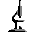

In [3]:
input = ij.scifio().datasetIO().open("http://imagej.net/images/ij-icon.gif")

ij.notebook().display(input)

Let's only permute the first dimension so that don't mix up our image too much:

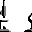

In [4]:
permutation = [ 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] as int[]

permuted = ij.op().run("permuteCoordinatesView", input, permutation, 0)

ij.notebook().display(permuted)

If we wanted to permute both dimensions of the image we could remove `d`.

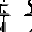

In [5]:
permutation = [ 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] as int[]

permuted = ij.op().run("permuteCoordinatesView", input, permutation)

ij.notebook().display(permuted)